In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

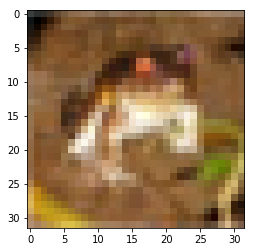

In [5]:
plt.imshow(x_train[0])

In [6]:
x_train[0].shape

(32, 32, 3)

In [0]:
from keras.utils import to_categorical

In [0]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [0]:
train_norm=x_train.astype('float32')
test_norm=x_test.astype('float32')

train_norm=train_norm/255.0
test_norm=test_norm/255.0



In [10]:
y_train[0].shape

(10,)

In [11]:
train_norm[0].shape

(32, 32, 3)

In [0]:
model=Sequential()

In [0]:
model.add(Conv2D(16,kernel_size=(3,3),padding="same",activation='relu',input_shape=train_norm[0].shape))
model.add(Conv2D(16,kernel_size=(3,3),padding="same",activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(32,kernel_size=(3,3),padding="same",activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding="same",activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(64,kernel_size=(3,3),padding="same",activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),padding="same",activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(128,activation='relu'))
# model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 32)          0         
__________

In [43]:
history=model.fit(train_norm,y_train,validation_data=(test_norm,y_test),epochs=15)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 12s 250us/step - loss: 1.6616 - acc: 0.3825 - val_loss: 1.3150 - val_acc: 0.5181
Epoch 2/15
50000/50000 [==============================] - 12s 231us/step - loss: 1.2669 - acc: 0.5427 - val_loss: 1.0931 - val_acc: 0.6105
Epoch 3/15
50000/50000 [==============================] - 11s 228us/step - loss: 1.1021 - acc: 0.6073 - val_loss: 0.9725 - val_acc: 0.6524
Epoch 4/15
50000/50000 [==============================] - 11s 228us/step - loss: 1.0141 - acc: 0.6403 - val_loss: 0.8965 - val_acc: 0.6789
Epoch 5/15
50000/50000 [==============================] - 11s 228us/step - loss: 0.9553 - acc: 0.6613 - val_loss: 0.8475 - val_acc: 0.7001
Epoch 6/15
50000/50000 [==============================] - 11s 228us/step - loss: 0.9168 - acc: 0.6758 - val_loss: 0.8373 - val_acc: 0.7034
Epoch 7/15
50000/50000 [==============================] - 11s 230us/step - loss: 0.8759 - acc: 0.6906 - val_loss: 0.

In [44]:
model.evaluate(test_norm,y_test)

10000/10000 [==============================] - 1s 84us/step


[0.7754018783569336, 0.7353]

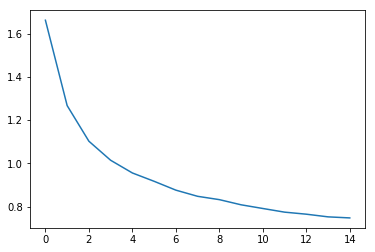

In [47]:
plt.plot(history.epoch,history.history['loss'])

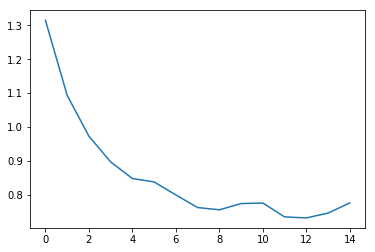

In [46]:
plt.plot(history.epoch,history.history['val_loss'])